<h1>Analyzing Pamantasan ng Lungsod ng Pasig Student Sentiments Towards Professor Performance: A Naive Bayes Approach</h1>

Importing necessary libraries

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gradio as gr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

c:\Users\Wayan\Desktop\Sentimental-analysis-of-Professor-Performance\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2>DATA LOADING AND DESCRIPTION</h2>

The program starts by reading the data from the "Feedback.xlsx" file and provides an informative summary.

In [2]:
cmt = pd.read_excel("Feedback.xlsx")

cmt.head()

,Label,Comments
0,0,teacher are punctual but they should also give...
1,1,Good
2,1,Excellent lectures are delivered by teachers a...
3,1,Good
4,1,teachers give us all the information required ...


Summarization of dataset prints out total numbers per label type (-1, 0, 1)

In [3]:
# Summarizes the dataset
print("DATASET")
print("DIMENSION: ", cmt.shape)
print()
print("SUMMARY")
print(cmt.groupby("Label").size()) 
print()

DATASET
DIMENSION:  (1673, 2)

SUMMARY
Label
-1     337
 0     295
 1    1041
dtype: int64



<h2>DATA PREPROCESSING</h2>

The data must undergo text cleaning and standardization to remove irrelevant information that doesn't contribute to the sentiment detection of text.

In [4]:
# Clean comments to remove special characters
def clean_cmt(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text) 
    text = text.lower() 
    return text

cmt["cleaned_comments"] = cmt["Comments"].apply(clean_cmt)

Creating a Bag-of-Words representation and vectorizing the data.

In [5]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(cmt["cleaned_comments"])

To get an unbiased estimate of the model’s performance, we need to evaluate it on the data we didn’t use for training. The dataset is splitted using a single-split method.

80% of the data will be used for training and 20% will be used for testing.

In [6]:
x_train, X_test, y_train, y_test = train_test_split(features, cmt["Label"], test_size=0.2, random_state=42)

<h2>MODEL TRAINING AND EVALUATION</h2>

The model is then trained and tested. To evaluate the model performance metrics such as accuracy, precision, recall, and F1 score will be measured.

In [7]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

<h3>Accuracy</h3>

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8269


<h3>Precision and Recall</h3>

Precision and recall usees a confusion matrix to introduce them.

In [9]:
cm = confusion_matrix(y_test, y_pred)

<h4>Visualizing the confusion matrix</h4>

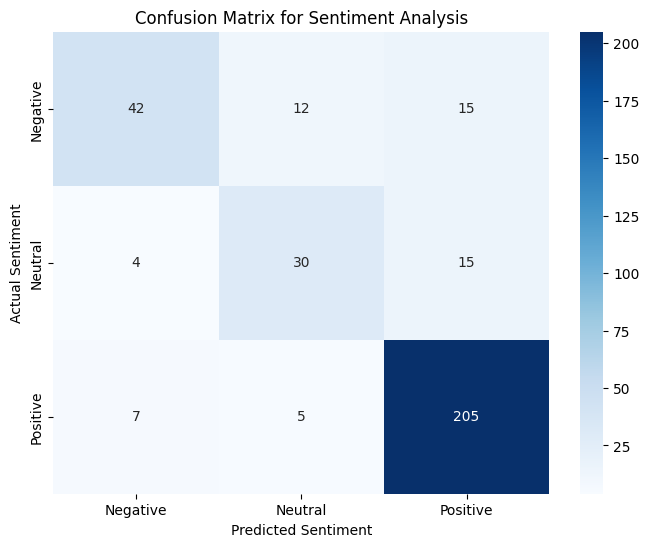

In [10]:
class_labels = {
    -1: "Negative",
    0: "Neutral",
    1: "Positive"
}

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[class_labels[i] for i in class_labels.keys()],
    yticklabels=[class_labels[i] for i in class_labels.keys()],
)

plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()

In [11]:
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8217
Recall: 0.8269


<h3>F1 score</h3>

F1 score is the harmonic between precision and recall. 

In [12]:
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.8208


<h2>PREDICTING SENTIMENT OF NEW FEEDBACK</h2>

Using gradio to simulate the uploading process and sentimental analysis.

In [13]:
def sentiment(file):
    cmt = pd.read_excel(file) 
    texts = cmt["Feedback"]

    sentiments = []
    for text in texts:
        cleaned_comment = clean_cmt(text) 
        new_features = vectorizer.transform([cleaned_comment])
        predicted_sentiment = model.predict(new_features)[0]

        if predicted_sentiment == 1:
            sentiment = "Positive"
        elif predicted_sentiment == 0:
            sentiment = "Neutral"
        elif predicted_sentiment == -1:
            sentiment = "Negative"

        sentiments.append(sentiment)

    sentiment_output = ""
    for i, row in cmt.iterrows(): #iterates each row 
        sentiment = sentiments[i]
        text = row["Feedback"]
        sentiment_output += f"{text}:  {sentiment}\n"  

    return sentiment_output
    
#Creating a gradio interface
app =  gr.Interface(title = "Sentiment analysis", description = "Analyzing Pamantasan ng Lungsod ng Pasig Student Sentiments Towards Professor Performance: A Naive Bayes Approach", fn = sentiment, inputs = [gr.File(label="Upload a file")], outputs = "textbox")
app.launch()

Running on local URL:  http://127.0.0.1:7930

To create a public link, set `share=True` in `launch()`.
